In [34]:
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import ticker

import pandas as pd
import dill
import numpy as np
sns.set(font_scale=2.5, style='whitegrid')

In [4]:
#!pip install palettable
from palettable.cartocolors.diverging import Temps_5, Temps_3

In [169]:
df2 = pd.read_csv('../experiments/transfer_learning/width_expt2.csv')


In [192]:
df = pd.read_csv('../experiments/transfer_learning/width_expt.csv')


In [193]:
df['dataset_len'] = (df['prefix_message_len']+df['train_nll_bits'])/8192
dfs = [df[df['d']==i].sort_values('base_width') for i in np.unique(df['d'])]
bounds= [dfi['raw_err_bound_100'] for dfi in dfs]
bds = np.stack(bounds,axis=0)
ids = np.argmin(bds,axis=0)
orig_ids = [dfs[idd].iloc[j].name for j,idd in enumerate(ids)]
mindf = df.loc[orig_ids].sort_values('base_width')
mindf.reset_index()

,index,Unnamed: 0,base_width,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,...,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100,dataset_len
0,7,7,2,3500,trial10/,NaN,0.669901,0.0001,0.6528,2285.241653,...,39.017999,39.810002,0.0,62.118062,-2.0,79195.617918,7818.855926,32.230002,34.720004,10.621884
1,3,3,4,2000,trial1/,NaN,0.706337,0.0001,0.6724,2275.626642,...,38.848001,39.320004,0.0,57.063342,-2.0,78541.540215,4788.435915,30.348003,32.760000,10.172116
2,5,5,6,2000,trial2/,NaN,0.721980,0.0001,0.6870,2404.938786,...,37.892002,38.700002,0.0,56.178143,-2.0,76523.141643,4824.457637,28.936005,31.300002,9.930127
3,9,9,8,3500,trial13/,NaN,0.755644,0.0001,0.7238,2194.207592,...,32.160002,33.590001,0.0,55.965061,-2.0,66116.773735,8260.014755,23.432004,27.620000,9.079198
4,14,14,12,3500,trial14/,NaN,0.760594,0.0001,0.7323,3294.447299,...,32.451999,33.900005,0.0,56.269889,-2.0,66467.458424,8265.016507,23.006004,26.770002,9.122617
5,15,15,16,3500,trial15/,NaN,0.763960,0.0001,0.7145,3434.560525,...,32.635999,34.119999,0.0,56.482742,-2.0,66677.912509,8283.022804,23.520005,28.549999,9.150505
6,25,25,32,5000,trial26/,NaN,0.791089,0.0001,0.7301,4890.831444,...,29.142004,31.709999,0.0,57.499537,-2.0,60483.032988,11804.047369,20.760000,26.990002,8.824106
7,18,18,48,3500,trial17/,NaN,0.734653,0.0001,0.6773,6311.937648,...,37.775999,39.140004,0.0,61.690753,-2.0,76616.598710,8370.053047,27.442002,32.270002,10.374347
8,17,17,64,3500,trial18/,NaN,0.710693,0.0001,0.6550,4476.566654,...,38.372004,39.539999,0.0,62.162438,-2.0,78191.724035,8296.027343,29.074001,34.500003,10.557587
9,28,28,96,3500,trial19/,NaN,0.684356,0.0001,0.6270,14034.437269,...,39.710003,41.500002,0.0,63.424009,-2.0,80207.860678,8286.023852,31.708002,37.300003,10.802476


In [171]:
mindf

,Unnamed: 0,base_width,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100,dataset_len
7,7,2,3500,trial10/,NaN,0.669901,0.0001,0.6528,2285.241653,4278,39.017999,39.810002,0.0,62.118062,-2.0,79195.617918,7818.855926,32.230002,34.720004,87014.473844
3,3,4,2000,trial1/,NaN,0.706337,0.0001,0.6724,2275.626642,16322,38.848001,39.320004,0.0,57.063342,-2.0,78541.540215,4788.435915,30.348003,32.760000,83329.976130
5,5,6,2000,trial2/,NaN,0.721980,0.0001,0.6870,2404.938786,36142,37.892002,38.700002,0.0,56.178143,-2.0,76523.141643,4824.457637,28.936005,31.300002,81347.599280
9,9,8,3500,trial13/,NaN,0.755644,0.0001,0.7238,2194.207592,63738,32.160002,33.590001,0.0,55.965061,-2.0,66116.773735,8260.014755,23.432004,27.620000,74376.788490
14,14,12,3500,trial14/,NaN,0.760594,0.0001,0.7323,3294.447299,142258,32.451999,33.900005,0.0,56.269889,-2.0,66467.458424,8265.016507,23.006004,26.770002,74732.474931
15,15,16,3500,trial15/,NaN,0.763960,0.0001,0.7145,3434.560525,251882,32.635999,34.119999,0.0,56.482742,-2.0,66677.912509,8283.022804,23.520005,28.549999,74960.935313
25,25,32,5000,trial26/,NaN,0.791089,0.0001,0.7301,4890.831444,1001418,29.142004,31.709999,0.0,57.499537,-2.0,60483.032988,11804.047369,20.760000,26.990002,72287.080357
18,18,48,3500,trial17/,NaN,0.734653,0.0001,0.6773,6311.937648,2248618,37.775999,39.140004,0.0,61.690753,-2.0,76616.598710,8370.053047,27.442002,32.270002,84986.651757
17,17,64,3500,trial18/,NaN,0.710693,0.0001,0.6550,4476.566654,3993482,38.372004,39.539999,0.0,62.162438,-2.0,78191.724035,8296.027343,29.074001,34.500003,86487.751379
28,28,96,3500,trial19/,NaN,0.684356,0.0001,0.6270,14034.437269,8976202,39.710003,41.500002,0.0,63.424009,-2.0,80207.860678,8286.023852,31.708002,37.300003,88493.884530


In [173]:
df2['dataset_len'] =df2['prefix_message_len']+df2['train_nll_bits']
df2

,Unnamed: 0,base_width,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100,dataset_len
0,0,48,7500,trial0/,NaN,0.838614,0.0001,0.7502,4439.454242,0.0,26.736003,29.140002,0.0,61.138714,-2.0,54770.554153,17520.188815,17.290002,24.980003,72290.742969
1,1,64,7500,trial1/,NaN,0.821584,0.0001,0.7330,5340.078600,0.0,27.582002,30.570000,0.0,62.047572,-2.0,56124.925382,17584.199353,18.116003,26.700002,73709.124735
2,2,48,10000,trial3/,NaN,0.863168,0.0001,0.7665,4295.906610,0.0,25.084001,27.930003,0.0,64.619593,-2.0,51441.295971,23381.022517,13.328004,23.350000,74822.318488
3,3,96,7500,trial2/,NaN,0.802970,0.0001,0.7083,9803.507176,0.0,30.062002,33.230001,0.0,64.444307,-2.0,61933.645535,17556.194748,20.824003,29.170001,79489.840283
4,4,64,10000,trial4/,NaN,0.849109,0.0001,0.7521,5849.798006,0.0,24.972004,28.119999,0.0,64.444488,-2.0,51112.671013,23300.012491,14.557999,24.790001,74412.683504
5,5,48,15000,trial6/,NaN,0.917030,0.0001,0.7817,3861.795965,0.0,20.076001,24.110001,0.0,67.768635,-2.0,41287.386638,34699.162717,8.668000,21.830004,75986.549355
6,6,96,10000,trial5/,NaN,0.835842,0.0001,0.7331,8878.957470,0.0,27.237999,30.510002,0.0,66.619019,-2.0,55265.002244,23287.010879,16.626000,26.690000,78552.013123
7,7,64,15000,trial7/,NaN,0.910297,0.0001,0.7781,7904.253671,0.0,20.930004,26.170003,0.0,68.639605,-2.0,43298.836879,34776.169119,9.028000,22.190005,78075.005998
8,8,96,15000,trial8/,NaN,0.894653,0.0001,0.7630,8191.231398,0.0,21.506000,25.790000,0.0,69.070627,-2.0,44187.738318,34592.153798,10.418004,23.700005,78779.892117


In [196]:
width2params = {2: 4278, 4: 16322, 6: 36142, 8: 63738, 12: 142258, 16: 251882, 32: 1001418, 48: 2248618, 64: 3993482, 96: 8976202}
params = list(width2params.values())
mindf['params']=params

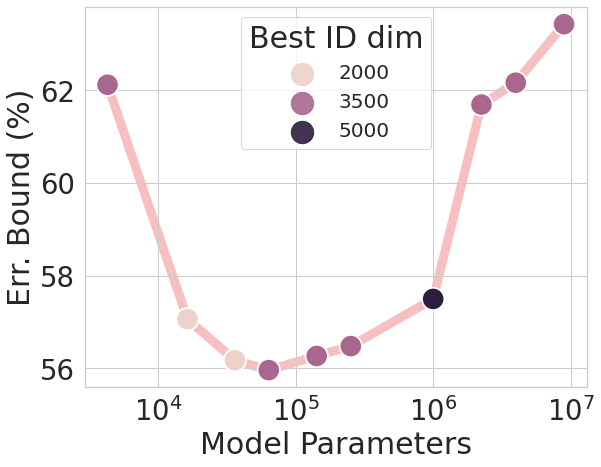

In [168]:
fig, ax = plt.subplots(figsize=(9,7))
df2 = df#df[df['d']==3500]
sns.lineplot(data=mindf, ax=ax, x='params',y='raw_err_bound_100',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0)
sns.scatterplot(data=mindf, ax=ax,x='params',y='raw_err_bound_100',hue='d',marker='o', s=500,zorder=1)
plt.xscale('log')
plt.ylabel('Err. Bound (%)')
plt.xlabel("Model Parameters")

# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-1,1))
# ax.xaxis.set_major_formatter(formatter)

# ax.set(xlabel=r'$d$', ylabel='Train Accuracy')

handles, labels = ax.get_legend_handles_labels()
for h in handles:
    h.set_sizes([500])
    h.set_alpha(.9)
ax.legend(handles=handles, labels=labels, title='Best ID dim', fontsize=20)
fig.savefig('model_width.pdf', bbox_inches='tight')
# fig.show()

In [ ]:
fig, ax = plt.subplots(figsize=(9,7))
df2 = df#df[df['d']==3500]
mindf['dataset_len'] = mindf['prefix_message_len']+mindf['train_nll_bits']
sns.lineplot(data=mindf, ax=ax, x='params',y='raw_err_bound_100',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0)
sns.scatterplot(data=mindf, ax=ax,x='params',y='raw_err_bound_100',hue='d',marker='o', s=500,zorder=1)
plt.xscale('log')
plt.ylabel('Err. Bound (%)')
plt.xlabel("Model Parameters")

# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-1,1))
# ax.xaxis.set_major_formatter(formatter)

# ax.set(xlabel=r'$d$', ylabel='Train Accuracy')

handles, labels = ax.get_legend_handles_labels()
for h in handles:
    h.set_sizes([500])
    h.set_alpha(.9)
ax.legend(handles=handles, labels=labels, title='Best ID dim', fontsize=20)
fig.savefig('model_width.pdf', bbox_inches='tight')
# fig.show()

In [195]:
mindf

,Unnamed: 0,base_width,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100,dataset_len
7,7,2,3500,trial10/,NaN,0.669901,0.0001,0.6528,2285.241653,0.0,39.017999,39.810002,0.0,62.118062,-2.0,79195.617918,7818.855926,32.230002,34.720004,10.621884
3,3,4,2000,trial1/,NaN,0.706337,0.0001,0.6724,2275.626642,0.0,38.848001,39.320004,0.0,57.063342,-2.0,78541.540215,4788.435915,30.348003,32.760000,10.172116
5,5,6,2000,trial2/,NaN,0.721980,0.0001,0.6870,2404.938786,0.0,37.892002,38.700002,0.0,56.178143,-2.0,76523.141643,4824.457637,28.936005,31.300002,9.930127
9,9,8,3500,trial13/,NaN,0.755644,0.0001,0.7238,2194.207592,0.0,32.160002,33.590001,0.0,55.965061,-2.0,66116.773735,8260.014755,23.432004,27.620000,9.079198
14,14,12,3500,trial14/,NaN,0.760594,0.0001,0.7323,3294.447299,0.0,32.451999,33.900005,0.0,56.269889,-2.0,66467.458424,8265.016507,23.006004,26.770002,9.122617
15,15,16,3500,trial15/,NaN,0.763960,0.0001,0.7145,3434.560525,0.0,32.635999,34.119999,0.0,56.482742,-2.0,66677.912509,8283.022804,23.520005,28.549999,9.150505
25,25,32,5000,trial26/,NaN,0.791089,0.0001,0.7301,4890.831444,0.0,29.142004,31.709999,0.0,57.499537,-2.0,60483.032988,11804.047369,20.760000,26.990002,8.824106
18,18,48,3500,trial17/,NaN,0.734653,0.0001,0.6773,6311.937648,0.0,37.775999,39.140004,0.0,61.690753,-2.0,76616.598710,8370.053047,27.442002,32.270002,10.374347
17,17,64,3500,trial18/,NaN,0.710693,0.0001,0.6550,4476.566654,0.0,38.372004,39.539999,0.0,62.162438,-2.0,78191.724035,8296.027343,29.074001,34.500003,10.557587
28,28,96,3500,trial19/,NaN,0.684356,0.0001,0.6270,14034.437269,0.0,39.710003,41.500002,0.0,63.424009,-2.0,80207.860678,8286.023852,31.708002,37.300003,10.802476


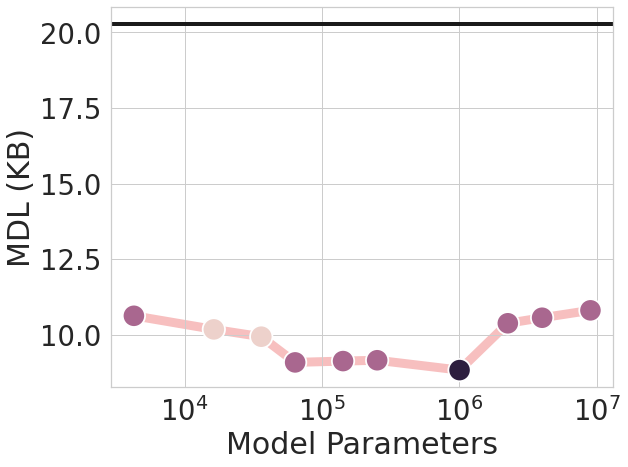

In [197]:

fig, ax = plt.subplots(figsize=(9,7))
#df = df[df['d']==3500]
# df = pd.read_csv('../experiments/transfer_learning/width_expt.csv')
# df['dataset_len'] = (df['prefix_message_len']+df['train_nll_bits'])/8192
# dfs = [df[df['d']==i].sort_values('base_width') for i in np.unique(df['d'])]
# bounds= [dfi['dataset_len'] for dfi in dfs]
# bds = np.stack(bounds,axis=0)
# ids = np.argmin(bds,axis=0)
# orig_ids = [dfs[idd].iloc[j].name for j,idd in enumerate(ids)]
# mindf2 = df.loc[orig_ids].sort_values('base_width')
# mindf2.reset_index()
# width2params = {2: 4278, 4: 16322, 6: 36142, 8: 63738, 12: 142258, 16: 251882, 32: 1001418, 48: 2248618, 64: 3993482, 96: 8976202}
# params = list(width2params.values())
# mindf2['params']=params

sns.lineplot(data=mindf, ax=ax, x='params',y='dataset_len',legend=False, alpha=.5, lw=9,color='lightcoral',zorder=0)
sns.scatterplot(data=mindf, ax=ax,x='params',y='dataset_len',hue='d',marker='o', s=500,zorder=1,legend=False)
plt.xscale('log')
plt.axhline(y=50000*np.log2(10)/(8192), color='k', linestyle='-',lw=4)
#plt.ylim(5e4,2e5)
#plt.yscale('log')
plt.xscale('log')
plt.ylabel('MDL (KB)')
plt.xlabel("Model Parameters")
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-1,1))
# ax.xaxis.set_major_formatter(formatter)

# ax.set(xlabel=r'$d$', ylabel='Train Accuracy')

# handles, labels = ax.get_legend_handles_labels()
# for h in handles:
#     h.set_sizes([500])
#     h.set_alpha(.9)
#ax.legend()
#ax.legend(handles=handles, labels=labels, title='Best ID dim', fontsize=20)
fig.savefig('model_width_compression.pdf', bbox_inches='tight')
# sns.lineplot(data=mindf, ax=ax, x='params',y='train_nll_bits',
#              legend=False, alpha=.9, lw=9)
# sns.lineplot(data=mindf, ax=ax, x='params',y='prefix_message_len',
#              legend=False, alpha=.9, lw=9)


In [190]:
mindf

,Unnamed: 0,base_width,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100,dataset_len
7,7,2,3500,trial10/,NaN,0.669901,0.0001,0.6528,2285.241653,0.0,39.017999,39.810002,0.0,62.118062,-2.0,79195.617918,7818.855926,32.230002,34.720004,10.621884
3,3,4,2000,trial1/,NaN,0.706337,0.0001,0.6724,2275.626642,0.0,38.848001,39.320004,0.0,57.063342,-2.0,78541.540215,4788.435915,30.348003,32.760000,10.172116
5,5,6,2000,trial2/,NaN,0.721980,0.0001,0.6870,2404.938786,0.0,37.892002,38.700002,0.0,56.178143,-2.0,76523.141643,4824.457637,28.936005,31.300002,9.930127
9,9,8,3500,trial13/,NaN,0.755644,0.0001,0.7238,2194.207592,0.0,32.160002,33.590001,0.0,55.965061,-2.0,66116.773735,8260.014755,23.432004,27.620000,9.079198
14,14,12,3500,trial14/,NaN,0.760594,0.0001,0.7323,3294.447299,0.0,32.451999,33.900005,0.0,56.269889,-2.0,66467.458424,8265.016507,23.006004,26.770002,9.122617
15,15,16,3500,trial15/,NaN,0.763960,0.0001,0.7145,3434.560525,0.0,32.635999,34.119999,0.0,56.482742,-2.0,66677.912509,8283.022804,23.520005,28.549999,9.150505
25,25,32,5000,trial26/,NaN,0.791089,0.0001,0.7301,4890.831444,0.0,29.142004,31.709999,0.0,57.499537,-2.0,60483.032988,11804.047369,20.760000,26.990002,8.824106
18,18,48,3500,trial17/,NaN,0.734653,0.0001,0.6773,6311.937648,0.0,37.775999,39.140004,0.0,61.690753,-2.0,76616.598710,8370.053047,27.442002,32.270002,10.374347
17,17,64,3500,trial18/,NaN,0.710693,0.0001,0.6550,4476.566654,0.0,38.372004,39.539999,0.0,62.162438,-2.0,78191.724035,8296.027343,29.074001,34.500003,10.557587
28,28,96,3500,trial19/,NaN,0.684356,0.0001,0.6270,14034.437269,0.0,39.710003,41.500002,0.0,63.424009,-2.0,80207.860678,8286.023852,31.708002,37.300003,10.802476


In [159]:
mindf2

,Unnamed: 0,base_width,d,log_suffix,Minibatch_Loss,Train_Acc,lr0,test_Acc,time,params,raw_quant_train_err_100,raw_quant_test_err_100,raw_divergence_gains,raw_err_bound_100,raw_misc_extra_bits,train_nll_bits,prefix_message_len,train_err_100,test_err_100,dataset_len
7,7,2,3500,trial10/,NaN,0.669901,0.0001,0.6528,2285.241653,4278,39.017999,39.810002,0.0,62.118062,-2.0,79195.617918,7818.855926,32.230002,34.720004,87014.473844
8,8,4,3500,trial11/,NaN,0.746535,0.0001,0.7166,2318.948264,16322,33.474004,35.330003,0.0,57.121645,-2.0,69192.457144,8136.971328,25.238001,28.340000,77329.428472
19,19,6,5000,trial22/,NaN,0.784356,0.0001,0.7358,3026.504887,36142,28.522003,30.380005,0.0,56.583158,-2.0,58692.481248,11573.990461,21.154004,26.420003,70266.471709
9,9,8,3500,trial13/,NaN,0.755644,0.0001,0.7238,2194.207592,63738,32.160002,33.590001,0.0,55.965061,-2.0,66116.773735,8260.014755,23.432004,27.620000,74376.788490
22,22,12,5000,trial24/,NaN,0.801782,0.0001,0.7514,2286.217115,142258,29.588002,31.090003,0.0,57.849664,-2.0,60275.650444,11715.025481,19.604003,24.860001,71990.675925
24,24,16,5000,trial25/,NaN,0.793069,0.0001,0.7487,3710.396234,251882,29.008001,31.340003,0.0,57.279231,-2.0,59701.670842,11735.030414,19.771999,25.130004,71436.701256
25,25,32,5000,trial26/,NaN,0.791089,0.0001,0.7301,4890.831444,1001418,29.142004,31.709999,0.0,57.499537,-2.0,60483.032988,11804.047369,20.760000,26.990002,72287.080357
27,27,48,5000,trial27/,NaN,0.775050,0.0001,0.7090,6462.395923,2248618,33.682001,35.280001,0.0,61.968857,-2.0,67465.128755,11751.034355,22.214001,29.100001,79216.163109
26,26,64,5000,trial28/,NaN,0.756238,0.0001,0.6953,4561.962421,3993482,33.892000,36.450005,0.0,62.296760,-2.0,69697.844137,11859.060813,24.342000,30.470002,81556.904950
29,29,96,5000,trial29/,NaN,0.724752,0.0001,0.6676,8510.592749,8976202,35.214001,38.040000,0.0,63.543393,-2.0,71421.314122,11839.055931,26.918000,33.240002,83260.370053


In [182]:
50000*np.log2(10)/(1024*8)

20.275440032271497

In [183]:
70266/(1024*8)

8.577392578125

Text(0.5, 0, 'Base_Width')

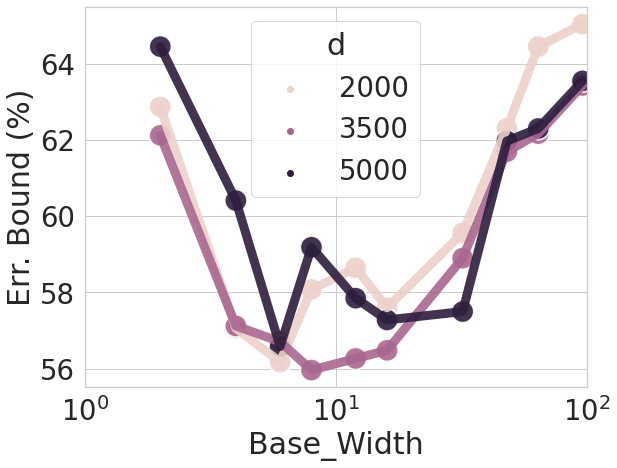

In [137]:
fig, ax = plt.subplots(figsize=(9,7))
df2 = df#df[df['d']==3500]
sns.lineplot(data=df, ax=ax, x='base_width',y='raw_err_bound_100',hue='d',
             legend=False, alpha=.9, lw=9)
sns.scatterplot(data=df, ax=ax,x='base_width',y='raw_err_bound_100',hue='d',
                alpha=.9,marker='o', s=500)
plt.xscale('log')
plt.xlim(1,100)
plt.ylabel('Err. Bound (%)')
plt.xlabel("Base_Width")

<AxesSubplot:xlabel='base_width', ylabel='dataset_len'>

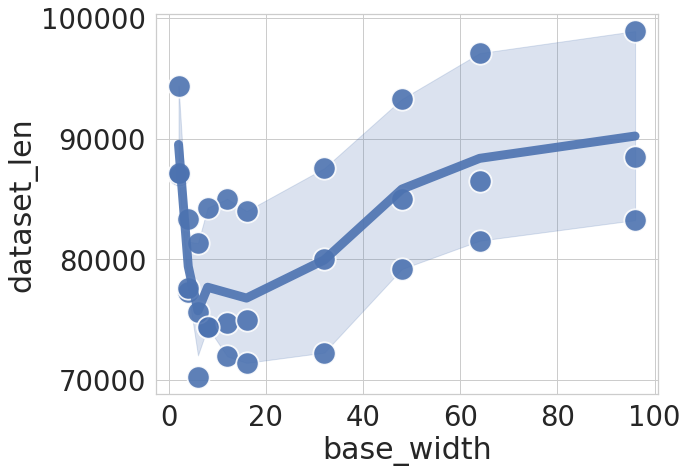

In [32]:
fig, ax = plt.subplots(figsize=(9,7))
#df = df[df['d']==3500]
df['dataset_len'] = df['prefix_message_len']+df['train_nll_bits']
sns.lineplot(data=df, ax=ax, x='base_width',y='dataset_len',
             legend=False, alpha=.9, lw=9)
sns.scatterplot(data=df, ax=ax,x='base_width',y='dataset_len',
                alpha=.9,marker='o', s=500)
#sns.lineplot(data=df, ax=ax, x='base_width',y='train_nll_bits',legend=False, alpha=.9, lw=9)
#sns.lineplot(data=df, ax=ax, x='base_width',y='prefix_message_len',legend=False, alpha=.9, lw=9)
# formatter = ticker.ScalarFormatter(useMathText=True)
# formatter.set_scientific(True)
# formatter.set_powerlimits((-1,1))
# ax.xaxis.set_major_formatter(formatter)

# ax.set(xlabel=r'$d$', ylabel='Train Accuracy')

# handles, labels = ax.get_legend_handles_labels()
# for h in handles:
#     h.set_sizes([500])
#     h.set_alpha(.9)
# ax.legend(handles=handles, labels=labels, title='', fontsize=24)

# fig.show()

In [ ]:
folder = '../experiments/transfer_learning/projectors_comparison2'
dfs = []
for name in ['results.df','sparse_operator.df']:
    with open(f'{folder}/{name}', 'rb') as f:
        dfs.append(dill.load(f))
df = pd.concat(dfs).reset_index().drop(columns=['index'])
df['projector'] = df['projector'].astype(str)
projectors = ['LazyRandom','BNLazyRandom','RoundedKron','RoundedDoubleKron']
new_names = ['Dense','FiLM','Kronecker Sum', 'Kronecker Product']
for name,proj in zip(new_names,projectors):
    df.loc[df['projector'].str.contains(proj),'P Matrix'] = name
df.loc[df['P Matrix'].isnull(),'P Matrix'] = 'Sparse'
df['GPU Hours'] = df['time']/3600.;

fig, ax = plt.subplots(figsize=(9,7))

sns.lineplot(data=df, ax=ax, x='d',y='Train_Acc', hue='P Matrix',
             legend=False, alpha=.9, lw=9,
             palette=Temps_5.mpl_colors, #sns.cubehelix_palette(n_colors=5),
             hue_order=['Sparse'] + new_names)
sns.scatterplot(data=df, ax=ax, x='d',y='Train_Acc',hue='P Matrix',
                alpha=.9,marker='o', s=500, palette=Temps_5.mpl_colors, #sns.cubehelix_palette(n_colors=5),
                hue_order=['Sparse'] + new_names)

formatter = ticker.ScalarFormatter(useMathText=True)
formatter.set_scientific(True)
formatter.set_powerlimits((-1,1))
ax.xaxis.set_major_formatter(formatter)

ax.set(xlabel=r'$d$', ylabel='Train Accuracy')

handles, labels = ax.get_legend_handles_labels()
for h in handles:
    h.set_sizes([500])
    h.set_alpha(.9)
ax.legend(handles=handles, labels=labels, title='', fontsize=24)

fig.show()
# fig.savefig('projector_transfer_acc.pdf', bbox_inches='tight')